## `EDA.ipynb` - разведочный анализ данных (exploratory data analysis)

**В этом блокноте анализируем датасет на наличие пропусков, корреляции признаков и т. д.**

In [1]:
import pandas as pd

movies = pd.read_csv("../data/TMDB_movie_dataset_v11.csv")
movies.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


**Проверяем пропущенные значения в датасет**

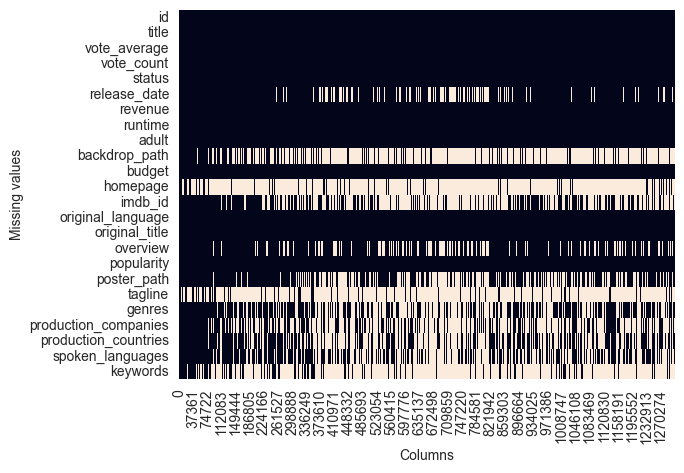

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(movies.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

**Добавляем столбец-индикатор наличия/отсутствия информации в столбце `overview`**

In [3]:
import numpy as np

movies["missing_overview"] = np.where(movies["overview"].isna(), 1, 0)

**Оцениваем корреляцию признков `budget`, `popularity`, `missing_overview`, `vote_average`**

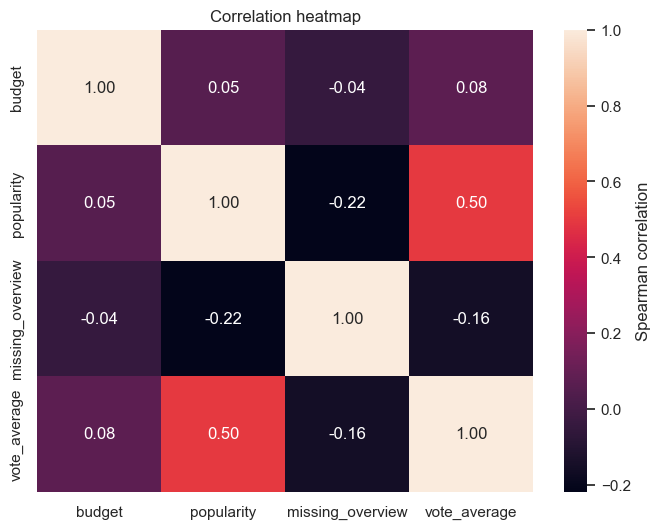

In [4]:
columns_of_interest = ["budget", "popularity",
                       "missing_overview", "vote_average"]

correlation_matrix = movies[columns_of_interest].corr(method="spearman")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

**Оставляем в датасете только непропущенные (не `NaN` значения)**

In [5]:
movies_missing = movies[~(movies["overview"].isna()) &
       ~(movies["runtime"].isna()) &
       ~(movies["vote_average"].isna()) &
       ~(movies["release_date"].isna())
]

In [6]:
movies_missing

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,missing_overview
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307617,817116,Horizontal Hold,0.000,0,Released,1977-02-05,0,33,False,NaN,...,Structuralist film using multiple photographs ...,0.600,NaN,NaN,NaN,NaN,France,No Language,NaN,0
1307618,817118,The Scoop,0.000,0,Released,1997-12-22,0,120,False,/7SBbr2p1mciaoKcS5q6SSUnpkML.jpg,...,During the final months before Hong Kong's ret...,0.600,/y3oUt6BMRHbBuZwJ5InMYRKLVLz.jpg,NaN,"Drama, Romance, Crime",NaN,NaN,NaN,NaN,0
1307619,817119,Une journée à la mer,0.000,0,Released,2020-04-15,0,22,False,NaN,...,A short story about the incestuous relationshi...,0.600,/l1pUGhJLFZMwt9kY82mdwlg8sro.jpg,NaN,NaN,NaN,France,"French, German",NaN,0
1307620,817120,Ambush,0.000,0,Released,2020-11-27,0,0,False,/8etnqnn24R3wcbkiJeYEH1q803Y.jpg,...,Frank rents rooms in Nadine’s building to comm...,1.118,/ux4J06xWPuA1ALXzQD6mNalljTJ.jpg,Nothing disturbs Nadine,NaN,"Rojo Films, Huapanguero Volador Films, Manosanta",Mexico,Spanish,NaN,0


**Оцениваем распределение фильмов по жанрам**

In [7]:
movies_missing["genres"].value_counts().reset_index().sort_values("count", ascending=False)

,genres,count
0,Documentary,112820
1,Drama,87086
2,Comedy,44334
3,Animation,27949
4,Horror,20646
...,...,...
12845,"Family, Adventure, Mystery, Drama",1
12846,"Comedy, Fantasy, Horror, Animation",1
12847,"Action, Mystery, Crime, Science Fiction",1
12848,"Thriller, Drama, Romance, Comedy",1


**Создаем новый столбец `words_in_overview`, который содержит информацию о том, сколько слов содержится в описании фильма**

In [8]:
movies_missing["words_in_overview"] = movies_missing["overview"].str.split().str.len()

C:\Users\user\AppData\Local\Temp\ipykernel_9724\2593697539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_missing["words_in_overview"] = movies_missing["overview"].str.split().str.len()


In [9]:
movies_missing

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,missing_overview,words_in_overview
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",0,44
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",0,33
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",0,67
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",0,28
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307617,817116,Horizontal Hold,0.000,0,Released,1977-02-05,0,33,False,NaN,...,0.600,NaN,NaN,NaN,NaN,France,No Language,NaN,0,17
1307618,817118,The Scoop,0.000,0,Released,1997-12-22,0,120,False,/7SBbr2p1mciaoKcS5q6SSUnpkML.jpg,...,0.600,/y3oUt6BMRHbBuZwJ5InMYRKLVLz.jpg,NaN,"Drama, Romance, Crime",NaN,NaN,NaN,NaN,0,20
1307619,817119,Une journée à la mer,0.000,0,Released,2020-04-15,0,22,False,NaN,...,0.600,/l1pUGhJLFZMwt9kY82mdwlg8sro.jpg,NaN,NaN,NaN,France,"French, German",NaN,0,32
1307620,817120,Ambush,0.000,0,Released,2020-11-27,0,0,False,/8etnqnn24R3wcbkiJeYEH1q803Y.jpg,...,1.118,/ux4J06xWPuA1ALXzQD6mNalljTJ.jpg,Nothing disturbs Nadine,NaN,"Rojo Films, Huapanguero Volador Films, Manosanta",Mexico,Spanish,NaN,0,31


**Выбираем только те строки, в которых в описании фильма от 20 до 45 слов**

In [10]:
movies_missing.loc[movies_missing["words_in_overview"].between(20, 45),
"overview"]

0          Cobb, a skilled thief who commits corporate es...
1          The adventures of a group of explorers who mak...
3          In the 22nd century, a paraplegic Marine is di...
7          A ticking-time-bomb insomniac and a slippery s...
8          Light years from Earth, 26 years after being a...
                                 ...                        
1307615    The Gossip Queen's "beams of bitterness" turn ...
1307616    Alapine is a lesbian community founded in rura...
1307618    During the final months before Hong Kong's ret...
1307619    A short story about the incestuous relationshi...
1307620    Frank rents rooms in Nadine’s building to comm...
Name: overview, Length: 308390, dtype: object

**Создаем новый датасет на основе фильтрации предыдущего (число слов в столбце `overview` более 20 и число оценок `vote_count` более 3500)**

In [11]:
movies_missing_20_words = movies_missing[(movies_missing["words_in_overview"] >= 20) &
                                         (movies_missing["vote_count"] >= 3500)]

In [12]:
movies_missing_20_words

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,missing_overview,words_in_overview
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",0,44
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",0,33
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",0,67
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",0,28
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,529203,The Croods: A New Age,7.521,3508,Released,2020-11-25,215905815,95,False,/ytTQoYkdpsgtfDWrNFCei8Mfbxu.jpg,...,63.456,/tbVZ3Sq88dZaCANlUcewQuHQOaE.jpg,The future ain't what it used to be.,"Animation, Family, Adventure, Fantasy, Comedy","Universal Pictures, DreamWorks Animation",United States of America,English,"sequel, prehistory, candid, playful, joyous, a...",0,80
1269,9392,The Descent,6.957,3507,Released,2005-07-08,57130027,99,False,/70TIOrfkQli0Smsfjua2McaDPci.jpg,...,23.007,/mxFPI4KYBk5ri9cPteIS8jiDFgj.jpg,Scream your last breath.,"Adventure, Horror","Pathé, Celador Films, Northmen Productions",United Kingdom,English,"panic, darkness, mutant, expedition, cave, cla...",0,50
1270,12153,White Chicks,6.919,3505,Released,2004-06-23,113086475,109,False,/di47xqYMCYpjqwnqNlO17X5qXMX.jpg,...,54.851,/aHTUpo45qy9QYIOnVITGGqLoVcA.jpg,They're going deep undercover.,"Comedy, Crime","Columbia Pictures, Revolution Studios, Wayans ...",United States of America,English,"undercover, fbi, cross dressing, car accident,...",0,63
1271,2832,Identity,7.180,3502,Released,2003-04-25,90259536,90,False,/7MwDOMrbjrKP3XQ5vw4cgB2DPaF.jpg,...,27.747,/bnidwEvWNAVJ3Uco9wWtuzWAfrx.jpg,The secret lies within.,"Mystery, Thriller","Konrad Pictures, Columbia Pictures",United States of America,English,"prostitute, prisoner, psychopath, nevada, dete...",0,44


**Создаем новый столбец `tagged_overview`, где объёденины `imdb_id` и `overview`**

In [13]:
movies_missing_20_words["tagged_overview"] = movies_missing_20_words[
    ["imdb_id", "overview"]].astype(str).agg(" ".join, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_9724\282472269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_missing_20_words["tagged_overview"] = movies_missing_20_words[


In [14]:
movies_missing_20_words

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,missing_overview,words_in_overview,tagged_overview
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",0,44,"tt1375666 Cobb, a skilled thief who commits co..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",0,33,tt0816692 The adventures of a group of explore...
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",0,67,tt0468569 Batman raises the stakes in his war ...
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",0,28,"tt0499549 In the 22nd century, a paraplegic Ma..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",0,47,tt0848228 When an unexpected enemy emerges and...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,529203,The Croods: A New Age,7.521,3508,Released,2020-11-25,215905815,95,False,/ytTQoYkdpsgtfDWrNFCei8Mfbxu.jpg,...,/tbVZ3Sq88dZaCANlUcewQuHQOaE.jpg,The future ain't what it used to be.,"Animation, Family, Adventure, Fantasy, Comedy","Universal Pictures, DreamWorks Animation",United States of America,English,"sequel, prehistory, candid, playful, joyous, a...",0,80,"tt2850386 Searching for a safer habitat, the p..."
1269,9392,The Descent,6.957,3507,Released,2005-07-08,57130027,99,False,/70TIOrfkQli0Smsfjua2McaDPci.jpg,...,/mxFPI4KYBk5ri9cPteIS8jiDFgj.jpg,Scream your last breath.,"Adventure, Horror","Pathé, Celador Films, Northmen Productions",United Kingdom,English,"panic, darkness, mutant, expedition, cave, cla...",0,50,"tt0435625 After a tragic accident, six friends..."
1270,12153,White Chicks,6.919,3505,Released,2004-06-23,113086475,109,False,/di47xqYMCYpjqwnqNlO17X5qXMX.jpg,...,/aHTUpo45qy9QYIOnVITGGqLoVcA.jpg,They're going deep undercover.,"Comedy, Crime","Columbia Pictures, Revolution Studios, Wayans ...",United States of America,English,"undercover, fbi, cross dressing, car accident,...",0,63,"tt0381707 Two FBI agent brothers, Marcus and K..."
1271,2832,Identity,7.180,3502,Released,2003-04-25,90259536,90,False,/7MwDOMrbjrKP3XQ5vw4cgB2DPaF.jpg,...,/bnidwEvWNAVJ3Uco9wWtuzWAfrx.jpg,The secret lies within.,"Mystery, Thriller","Konrad Pictures, Columbia Pictures",United States of America,English,"prostitute, prisoner, psychopath, nevada, dete...",0,44,tt0309698 Complete strangers stranded at a rem...

**Сохраняем очищенную версию датасета**

In [15]:
(
    movies_missing_20_words
    .drop(["original_title", "missing_overview", "words_in_overview"], axis=1)
    .to_csv("../data/movies_cleaned.csv", index=False)
)